# TEAM MEMBER
### 0716032 林佑鑫
### 0716050 吳泓毅
### 0716070 張育維

# GATHERING DATA

## Web crawler

### WE PROVIDED data.csv GENERATED BY THE WEB CRAWLER CODE BELOW, SO THAT TEACHER & TAs CAN DEMO THE REST OF the CODES WITHOUT RUNNING THE WEB CRAWLER.

In [1]:
import csv
import time
import requests
from bs4 import BeautifulSoup
from datetime import date, timedelta

# def daterange(start_date, end_date):
#     for n in range(int((end_date - start_date).days)):
#         yield start_date + timedelta(n)

# start_date = date(2010, 1, 1) #from 2010-01-01
# end_date = date.today() #today
# csvfile="data.csv"

# with open(csvfile,"w+",newline="",encoding="utf-8") as fp:
#     writer=csv.writer(fp)
#     for single_date in daterange(start_date, end_date):
#         if single_date.strftime("%d") == '01':
#             start_time = time.time()
#             url="https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=" + single_date.strftime("%Y-%m")
#             r=requests.get(url)
#             r.encoding="utf-8"
#             soup=BeautifulSoup(r.text,"lxml")
#             tag_table=soup.find(id="MyTable")
#             rows=tag_table.findAll("tr")
#             if single_date == start_date:
#                 for rnum, row in enumerate(rows):
#                     rowList = []
#                     for cnum, cell in enumerate(row.findAll(["td","th"])):
#                         if rnum >= 3 and cnum == 0:
#                             rowList.append(single_date.strftime("%Y-%m-")+cell.get_text().replace("\n","").replace("\r","").replace(u'\xa0', u'').replace(u' ', u'')) 
#                         elif rnum >= 2:
#                             rowList.append(cell.get_text().replace("\n","").replace("\r","").replace(u'\xa0', u'').replace(u' ', u''))
#                     writer.writerow(rowList)
#             else:
#                 for row in rows[3:]:
#                     rowList = []
#                     for cnum, cell in enumerate(row.findAll(["td","th"])):
#                         if cnum == 0:
#                             rowList.append(single_date.strftime("%Y-%m-")+cell.get_text().replace("\n","").replace("\r","").replace(u'\xa0', u'').replace(u' ', u'')) 
#                         else:
#                             rowList.append(cell.get_text().replace("\n","").replace("\r","").replace(u'\xa0', u'').replace(u' ', u''))
#                     writer.writerow(rowList)
#             print(single_date.strftime("%Y-%m") + ' finish!  cost time: %.2f seconds' %float(time.time() - start_time))

# DEFINE A PROBLEM

### GOAL: To remind bringing umbrella with rainfall prediction

# DATA PROCESSING

## Import packages

In [2]:
import urllib3 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set_palette("pastel") 
sns.set()

In [3]:
# pd.set_option('display.max_rows', None)

## 1. Data input

In [4]:
data = pd.read_csv("data.csv")
df = pd.DataFrame(data=data)
display(df)

,ObsTime,StnPres,SeaPres,StnPresMax,StnPresMaxTime,StnPresMin,StnPresMinTime,Temperature,TMax,TMaxTime,...,PrecpMax60,PrecpMax60Time,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVIMax,UVIMaxTime,CloudAmount
0,2010-01-01,1018.2,1019.0,1021.7,2010-01-0100:01,1015.7,2010-01-0114:24,16.5,19.4,2010-01-0113:16,...,0.0,...,3.6,34.1,9.18,10.4,1.5,4,2010-01-0113:00,9.4
1,2010-01-02,1016.4,1017.2,1018.9,2010-01-0223:13,1013.8,2010-01-0214:09,16.8,19.6,2010-01-0212:10,...,1.5,2010-01-0218:31,0.0,0.0,2.84,6.6,-0.6,2,2010-01-0212:00,9.8
2,2010-01-03,1016.8,1017.6,1019.3,2010-01-0308:52,1015.3,2010-01-0323:55,15.8,18.2,2010-01-0312:22,...,3.0,2010-01-0305:09,0.1,0.9,2.74,5.4,-0.2,2,2010-01-0313:00,8.4
3,2010-01-04,1015.3,1016.1,1017.0,2010-01-0421:23,1012.9,2010-01-0414:19,17.5,22.2,2010-01-0414:23,...,0.0,...,7.2,68.0,9.90,4.8,-2.3,3,2010-01-0413:00,8.0
4,2010-01-05,1018.9,1019.7,1021.6,2010-01-0509:48,1016.7,2010-01-0500:32,14.9,17.8,2010-01-0501:18,...,0.2,2010-01-0508:01,0.2,1.9,3.46,4.4,-0.3,2,2010-01-0513:00,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2020-12-27,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,2020-12-28,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,2020-12-29,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,2020-12-30,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## 2. Data Preprocessing

### Drop features we don't need

In [5]:
# Select features we need
df = df[['StnPres', 'SeaPres', 'Temperature', 'WS', 'WD', 'SunShine', 'VisbMean', 'UVIMax', 'CloudAmount', 'PrecpHour']]
df

,StnPres,SeaPres,Temperature,WS,WD,SunShine,VisbMean,UVIMax,CloudAmount,PrecpHour
0,1018.2,1019.0,16.5,3.6,70,3.6,10.4,4,9.4,0.0
1,1016.4,1017.2,16.8,1.1,160,0.0,6.6,2,9.8,9.2
2,1016.8,1017.6,15.8,2.3,60,0.1,5.4,2,8.4,10.2
3,1015.3,1016.1,17.5,1.5,70,7.2,4.8,3,8.0,0.0
4,1018.9,1019.7,14.9,4.4,70,0.2,4.4,2,10.0,2.2
...,...,...,...,...,...,...,...,...,...,...
4013,...,...,...,...,...,...,...,...,...,...
4014,...,...,...,...,...,...,...,...,...,...
4015,...,...,...,...,...,...,...,...,...,...
4016,...,...,...,...,...,...,...,...,...,...


### Drop data with any missing value

In [6]:
df = df.iloc[:int(date.today().strftime('%d'))-33,:]  # drop data that have not been detected yet
for column in df.columns: 
    df = df[~df[column].str.contains('X', na=False)]  # 'X' indicates instrument malfunction
    df = df[~df[column].str.contains('V', na=False)]  # 'V' indicates variable wind with no mean wind direction
display(df)

,StnPres,SeaPres,Temperature,WS,WD,SunShine,VisbMean,UVIMax,CloudAmount,PrecpHour
0,1018.2,1019.0,16.5,3.6,70,3.6,10.4,4,9.4,0.0
1,1016.4,1017.2,16.8,1.1,160,0.0,6.6,2,9.8,9.2
2,1016.8,1017.6,15.8,2.3,60,0.1,5.4,2,8.4,10.2
3,1015.3,1016.1,17.5,1.5,70,7.2,4.8,3,8.0,0.0
4,1018.9,1019.7,14.9,4.4,70,0.2,4.4,2,10.0,2.2
...,...,...,...,...,...,...,...,...,...,...
4001,1019.9,1023.6,15.6,3.0,80,0.0,8.3,1,10.0,11.5
4002,1020.7,1024.4,15.5,3.2,90,0.0,11.8,2,10.0,10.2
4003,1018.6,1022.3,16.6,3.9,90,0.4,35.0,4,9.0,0.0
4004,1016.9,1020.5,18.9,1.6,80,1.4,24.3,3,9.3,3.5


### Replace 'T' and '...' with 0.0

In [7]:
df = df.replace(['T '], [0.0])  # 'T' means trace, indicating that the precipitation is less than 0.1 mm
df = df.replace(['...'], [0.0])  # '...' indicates no observation
display(df)

,StnPres,SeaPres,Temperature,WS,WD,SunShine,VisbMean,UVIMax,CloudAmount,PrecpHour
0,1018.2,1019.0,16.5,3.6,70,3.6,10.4,4,9.4,0.0
1,1016.4,1017.2,16.8,1.1,160,0.0,6.6,2,9.8,9.2
2,1016.8,1017.6,15.8,2.3,60,0.1,5.4,2,8.4,10.2
3,1015.3,1016.1,17.5,1.5,70,7.2,4.8,3,8.0,0.0
4,1018.9,1019.7,14.9,4.4,70,0.2,4.4,2,10.0,2.2
...,...,...,...,...,...,...,...,...,...,...
4001,1019.9,1023.6,15.6,3.0,80,0.0,8.3,1,10.0,11.5
4002,1020.7,1024.4,15.5,3.2,90,0.0,11.8,2,10.0,10.2
4003,1018.6,1022.3,16.6,3.9,90,0.4,35.0,4,9.0,0.0
4004,1016.9,1020.5,18.9,1.6,80,1.4,24.3,3,9.3,3.5


### Shuffle the data

In [8]:
from sklearn.utils import shuffle

df = shuffle(df)
display(df)

,StnPres,SeaPres,Temperature,WS,WD,SunShine,VisbMean,UVIMax,CloudAmount,PrecpHour
1966,1009.9,1013.5,22.0,3.4,100,0.0,12.3,2,8.9,8.4
748,1015.1,1015.9,18.6,2.3,80,5.6,9.4,4,7.6,0.0
3303,1020.2,1023.9,15.7,2.8,90,0.0,15.3,2,10.0,6.8
3981,1015.2,1018.7,24.6,4.4,80,8.3,46.3,6,2.5,0.0
2063,1006.3,1009.7,27.9,1.8,80,0.3,12.8,5,9.0,7.5
...,...,...,...,...,...,...,...,...,...,...
554,1002.4,1003.1,30.1,1.8,300,5.4,10.0,8,7.5,0.5
3495,1004.5,1007.9,30.0,1.7,140,2.9,35.0,8,7.8,0.0
24,1023.2,1024.0,15.7,2.3,70,0.0,4.0,1,10.0,9.5
2628,1009.1,1012.7,18.3,1.2,60,0.0,3.2,1,10.0,13.3


### Transform label format

In [9]:
df['Rain'] = 0.0
df['PrecpHour'] = df['PrecpHour'].astype(str).astype(float)

# set rain to 1 if precipitation hours > 0
df.loc[(df.PrecpHour > 0.0) , 'Rain'] = 1
del df['PrecpHour']
for column in df.columns:
    df[column] = df[column].astype(float)
display(df)

,StnPres,SeaPres,Temperature,WS,WD,SunShine,VisbMean,UVIMax,CloudAmount,Rain
1966,1009.9,1013.5,22.0,3.4,100.0,0.0,12.3,2.0,8.9,1.0
748,1015.1,1015.9,18.6,2.3,80.0,5.6,9.4,4.0,7.6,0.0
3303,1020.2,1023.9,15.7,2.8,90.0,0.0,15.3,2.0,10.0,1.0
3981,1015.2,1018.7,24.6,4.4,80.0,8.3,46.3,6.0,2.5,0.0
2063,1006.3,1009.7,27.9,1.8,80.0,0.3,12.8,5.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...
554,1002.4,1003.1,30.1,1.8,300.0,5.4,10.0,8.0,7.5,1.0
3495,1004.5,1007.9,30.0,1.7,140.0,2.9,35.0,8.0,7.8,0.0
24,1023.2,1024.0,15.7,2.3,70.0,0.0,4.0,1.0,10.0,1.0
2628,1009.1,1012.7,18.3,1.2,60.0,0.0,3.2,1.0,10.0,1.0


## 3. Data Visualization

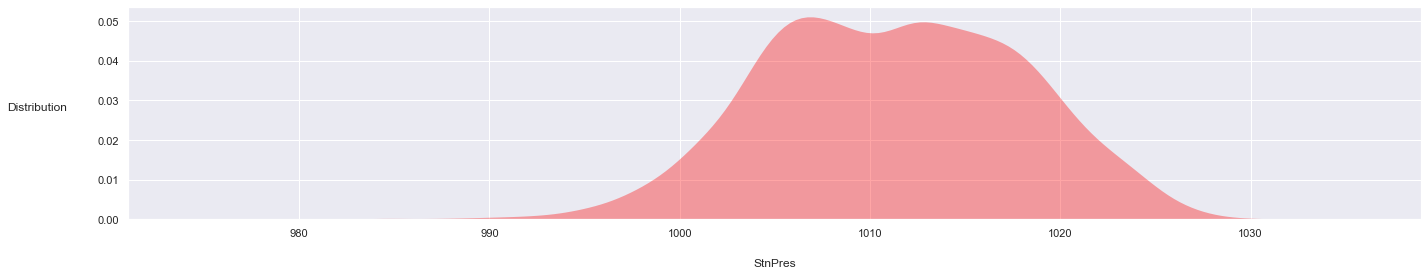

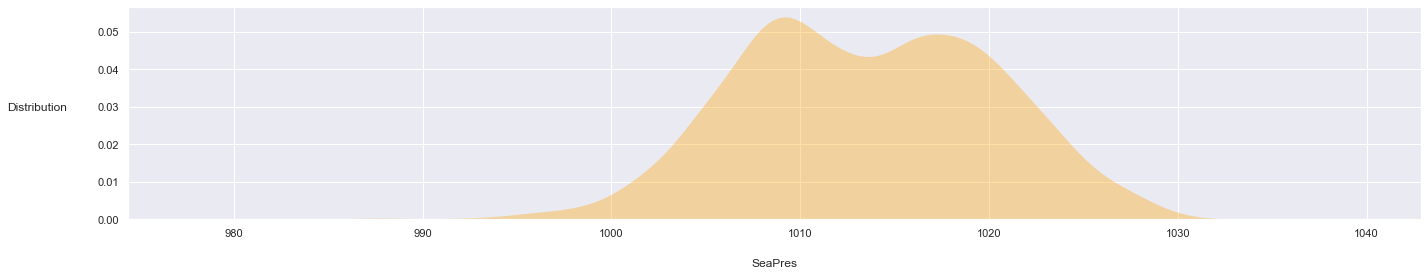

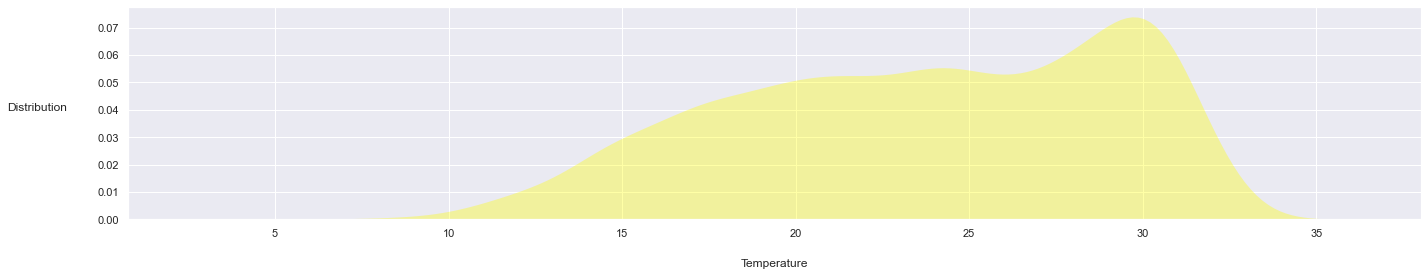

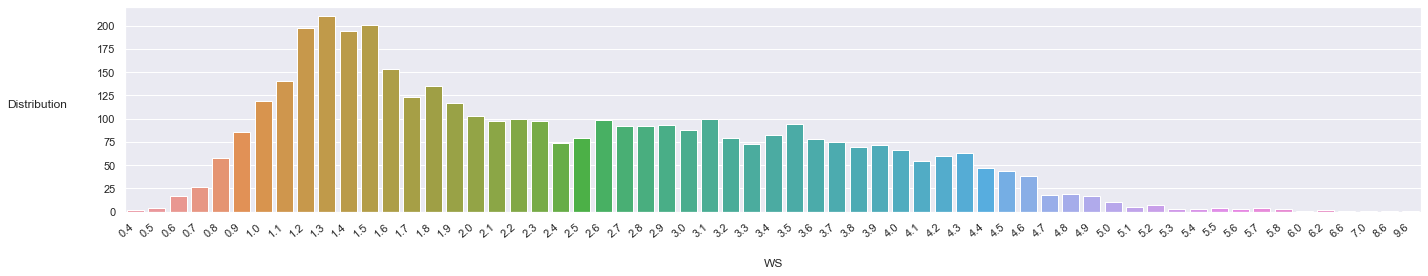

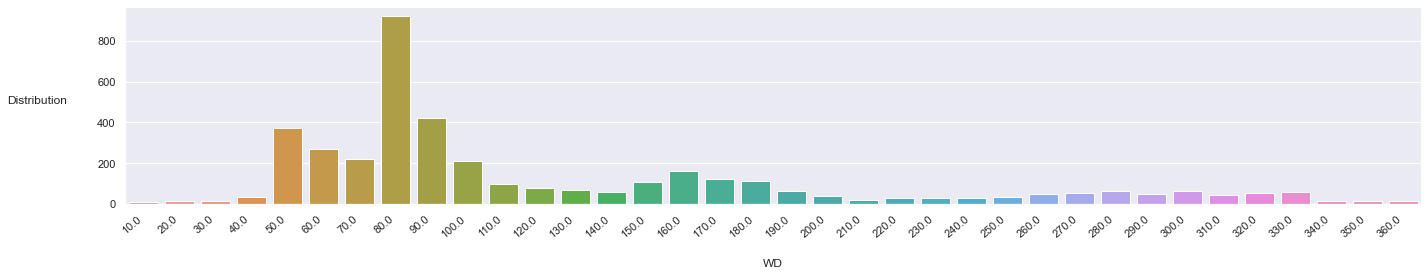

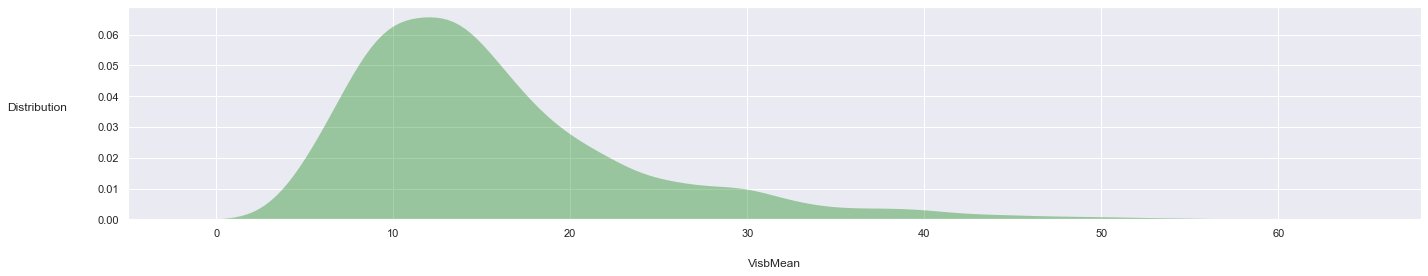

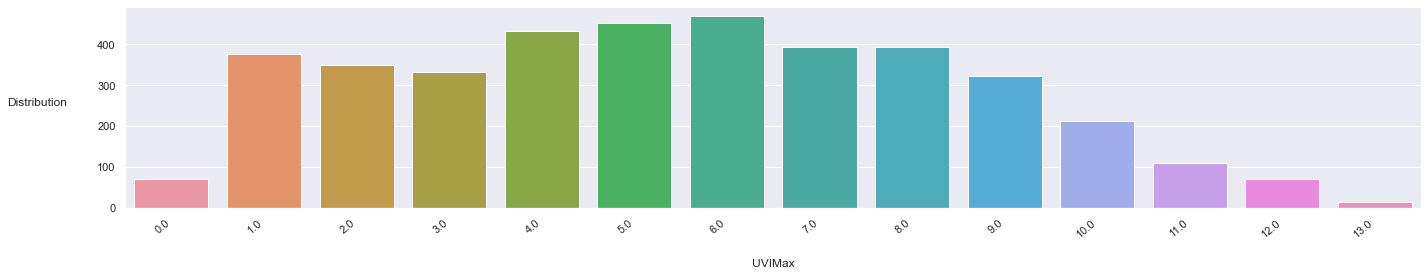

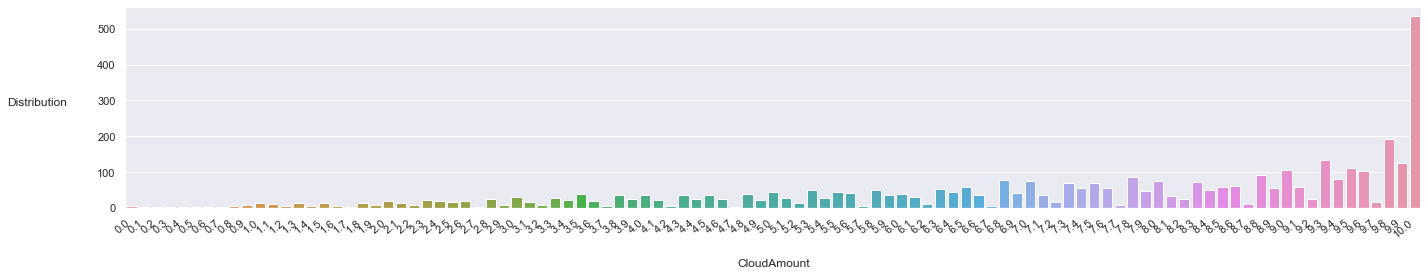

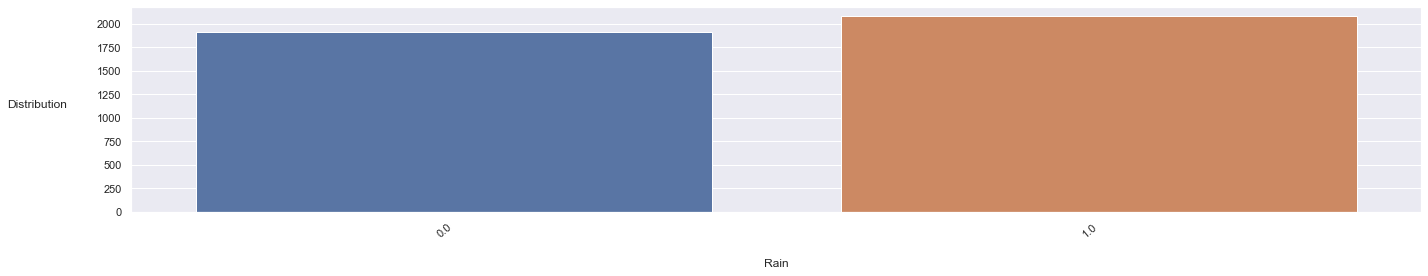

In [10]:
color = ['red' , 'orange' , 'yellow' , 'brown' , 'skyblue' , 'blue' , 'green' , 'purple']
for cnum , i in enumerate(df.columns):
    # 用kdeplt出每個column的value frequency (for continuous data)
    if cnum in [0, 1, 2, 6]:
        plt.figure(figsize=(20,4))
        sns.kdeplot(x = i , data = df, fill=True, color=color[cnum] , alpha=.35, linewidth=0)
        plt.xlabel(i , rotation=0 , labelpad=20)
        plt.ylabel("Distribution" , rotation=0 , labelpad=60)
        plt.tight_layout()
        plt.show()
    elif cnum == 5:
        continue
    # 用countplt出每個column的value frequency (for discrete data)
    else:
        plt.figure(figsize=(20,4))
        ax = sns.countplot(x = i , data = df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.xlabel(i , rotation=0 , labelpad=20)
        plt.ylabel("Distribution" , rotation=0 , labelpad=60)
        plt.tight_layout()
        plt.show()

## 4. Model Construction

### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfclf_h = RandomForestClassifier(n_estimators=100)
rfclf_kf = RandomForestClassifier(n_estimators=100)

### K-Nearest Neighbor

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knnclf_h = KNeighborsClassifier(n_neighbors=20)
knnclf_kf = KNeighborsClassifier(n_neighbors=20)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=100000)

## 5. Validation

### Holdout

In [14]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

### K-fold

In [15]:
from sklearn.model_selection import KFold

X_train_kf = []
X_test_kf = []
y_train_kf = []
y_test_kf = []

kf = KFold(n_splits = 3)
for train_index , test_index in kf.split(X):
    X_train_kf.append(X.iloc[train_index])
    X_test_kf.append(X.iloc[test_index]) 
    y_train_kf.append(y.iloc[train_index])
    y_test_kf.append(y.iloc[test_index])

## 6. Results

In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### Random Forest w/ Holdout

Confusion Matrix:
 [[466 118]
 [132 484]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       584
         1.0       0.80      0.79      0.79       616

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



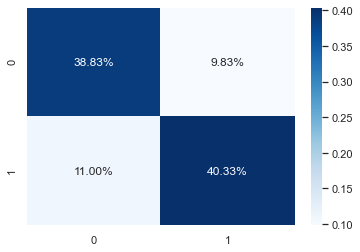

In [17]:
rfclf_h.fit(X_train , y_train)
y_pred = rfclf_h.predict(X_test)
rf_h_cm = confusion_matrix(y_test , y_pred)
print('Confusion Matrix:\n', rf_h_cm)
print(classification_report(y_test, y_pred))
sns.heatmap(rf_h_cm/np.sum(rf_h_cm), annot=True, fmt='.2%', cmap='Blues')
plt.show()

### Random Forest w/ K-fold

Confusion Matrix:
 [[1521  398]
 [ 397 1683]]
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1919
         1.0       0.81      0.81      0.81      2080

    accuracy                           0.80      3999
   macro avg       0.80      0.80      0.80      3999
weighted avg       0.80      0.80      0.80      3999



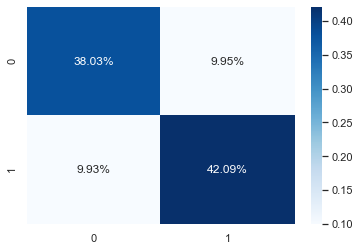

In [18]:
for i in range(0,3):
    rfclf_kf.fit(X_train_kf[i] , y_train_kf[i])

rf_y_preds = cross_val_predict(rfclf_kf, X, y, cv=3)
rf_kf_cm = confusion_matrix(y, rf_y_preds)
print('Confusion Matrix:\n', rf_kf_cm)
print(classification_report(y, rf_y_preds))
sns.heatmap(rf_kf_cm/np.sum(rf_kf_cm), annot=True, fmt='.2%', cmap='Blues')
plt.show()

### K-Nearest Neighbor w/ Holdout

Confusion Matrix:
 [[438 146]
 [153 463]]
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75       584
         1.0       0.76      0.75      0.76       616

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



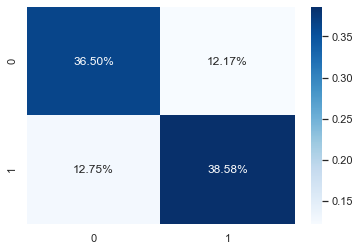

In [19]:
knnclf_h.fit(X_train , y_train)
y_pred = knnclf_h.predict(X_test)
knn_h_cm = confusion_matrix(y_test , y_pred)
print('Confusion Matrix:\n' , knn_h_cm)
print(classification_report(y_test, y_pred))
sns.heatmap(knn_h_cm/np.sum(knn_h_cm), annot=True, fmt='.2%', cmap='Blues')
plt.show()

### K-Nearest Neighbor w/ K-fold

Confusion Matrix:
 [[1400  519]
 [ 502 1578]]
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73      1919
         1.0       0.75      0.76      0.76      2080

    accuracy                           0.74      3999
   macro avg       0.74      0.74      0.74      3999
weighted avg       0.74      0.74      0.74      3999



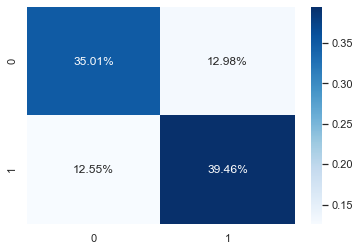

In [20]:
for i in range(0,3):
    knnclf_kf.fit(X_train_kf[i] , y_train_kf[i])
    
knn_y_preds = cross_val_predict(knnclf_kf, X, y, cv=3)
knn_kf_cm = confusion_matrix(y, knn_y_preds)
print('Confusion Matrix:\n' , knn_kf_cm)
print(classification_report(y, knn_y_preds))
sns.heatmap(knn_kf_cm/np.sum(knn_kf_cm), annot=True, fmt='.2%', cmap='Blues')
plt.show()

### Logistic Regression

Confusion Matrix:
 [[1382  537]
 [ 347 1733]]
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      1919
         1.0       0.76      0.83      0.80      2080

    accuracy                           0.78      3999
   macro avg       0.78      0.78      0.78      3999
weighted avg       0.78      0.78      0.78      3999



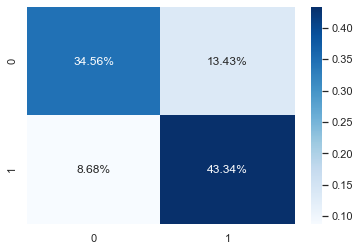

In [21]:
from sklearn.metrics import roc_curve, auc

log.fit(X , y)
log_y_preds = log.predict(X)
log_kf_cm = confusion_matrix(y, log_y_preds)
print('Confusion Matrix:\n' , log_kf_cm)
print(classification_report(y, log_y_preds))
sns.heatmap(log_kf_cm/np.sum(log_kf_cm), annot=True, fmt='.2%', cmap='Blues')
plt.show()

## 7. Comparison with ROC curve

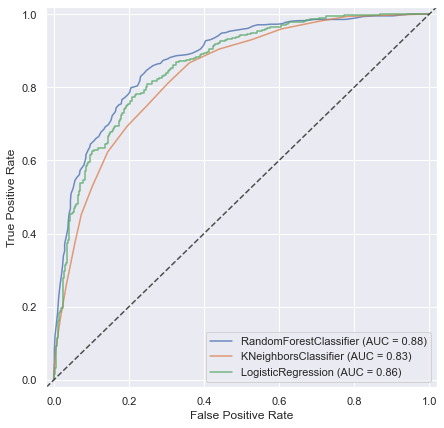

In [22]:
from sklearn.metrics import plot_roc_curve
rf_h_disp = plot_roc_curve(rfclf_h, X_test, y_test)
plt.close()  # not show plot with single curve
knn_h_disp = plot_roc_curve(knnclf_h, X_test, y_test)
plt.close()
log_disp = plot_roc_curve(log, X_test, y_test)
plt.close()

plt.figure(figsize=(7,7))
ax = plt.gca()
rf_h_disp.plot(ax=ax, alpha=0.8)
knn_h_disp.plot(ax=ax, alpha=0.8)
log_disp.plot(ax=ax, alpha=0.8)
plt.xlim(-0.02 , 1.02)
plt.ylim(-0.02 , 1.02)
ax.plot([-0.02 , 1.02], [-0.02 , 1.02], ls="--", c=".3")  # draw the random guess ROC curve
plt.show()

## 8. Application 

### Calculate mean value of each feature

In [23]:
mean = []
for col in df.iloc[:,:-1]:
    mean.append(df[col].mean())

### Prediction

##### If don't know the info, then type idk, it will apply mean value of that info.

In [24]:
outlis = []
guess = []
cols = []
for idx, col in enumerate(df.iloc[:,:-1]):
    cols.append(col)
    inp = input(col+': ')
    if inp == 'idk':
        inp = mean[idx]
    else:
        inp = int(inp)
    print('%.2f' % inp)
    guess.append(float(inp))
    
outlis.append(guess)

guessdf = pd.DataFrame(outlis,columns=cols)
guessdf

ans = []
ans.append(log.predict(guessdf))
ans.append(rfclf_h.predict(guessdf))
ans.append(rfclf_kf.predict(guessdf))
ans.append(knnclf_h.predict(guessdf))
ans.append(knnclf_kf.predict(guessdf))
if ans.count(0) < ans.count(1):
    print('\n****************************************\n**Don\'t forget to bring your umbrella!**\n****************************************')
else:
    print('\n******************\n**No rain today!**\n******************')

StnPres: idk
1011.21
SeaPres: idk
1013.52
Temperature: 21
21.00
WS: idk
2.40
WD: idk
124.47
SunShine: 8
8.00
VisbMean: 10
10.00
UVIMax: idk
5.52
CloudAmount: 10
10.00

****************************************
**Don't forget to bring your umbrella!**
****************************************


# Division of labor
### 0716032 林佑鑫 35%
### 0716050 吳泓毅 35%
### 0716070 張育維 30%